In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [ ]:
# Load dataset splits

train = pd.read_csv("../../data/splits/train_split.csv")
test = pd.read_csv("../../data/splits/test_split.csv")
val = pd.read_csv("../../data/splits/val_split.csv")


In [3]:
# def plot_class_distribution(split, title, axis):
#     sns.countplot(y=split["phase"], order=split["phase"].value_counts().index, ax=axis, color="royalblue")
#     axis.set_title(title)
#     axis.set_xlabel("Count")
#     axis.set_ylabel("Phase Label")



In [4]:
# Function to calculate and plot average frames per video
def plot_avg_frames_per_video(train, val, test, ax):
    train_avg = train.groupby("video_id")["frame_number"].count().mean()
    val_avg = val.groupby("video_id")["frame_number"].count().mean()
    test_avg = test.groupby("video_id")["frame_number"].count().mean()

    avg_frames = pd.DataFrame({
        "Split": ["Train", "Validation", "Test"],
        "Avg Frames Per Video": [train_avg, val_avg, test_avg]
    })

    sns.barplot(x="Split", y="Avg Frames Per Video", data=avg_frames, ax=ax, palette="Blues")
    ax.set_title("Average Frames Per Video in Each Split")
    ax.set_ylabel("Average Frame Count")

In [5]:
# # Define consistent colors for each phase
# phase_colors = {
#     "unknown": "royalblue",
#     "uva pick up": "darkorange",
#     "suture tie": "forestgreen",
#     "uva pull through": "red",
#     "2 arms placing": "purple",
#     "suture pull through": "brown",
#     "suture pick up": "magenta",
#     "placing rings 2 arms": "cyan",
#     "1 arm placing": "gold",
#     "pull off": "pink",
#     "placing rings": "lime",
#     "pull through": "gray",
#     "uva tie" : "yellow"
# }


# #  Function to plot a pie chart without labels or percentages
# def plot_pie_chart(df, title, ax):
#     phase_counts = df["phase"].value_counts()
#     colors = [phase_colors.get(phase, "black") for phase in phase_counts.index]  # Use predefined colors
#     wedges, _ = ax.pie(
#         phase_counts, startangle=90, colors=colors  # No labels or percentages
#     )
#     ax.set_title(title)
#     return wedges



# Define consistent colors for each phase
phase_colors = {
    "unknown": "royalblue",
    "uva pick up": "darkorange",
    "suture tie": "forestgreen",
    "uva pull through": "red",
    "2 arms placing": "purple",
    "suture pull through": "brown",
    "suture pick up": "magenta",
    "placing rings 2 arms": "cyan",
    "1 arm placing": "gold",
    "pull off": "pink",
    "placing rings": "lime",
    "pull through": "slateblue",
    "uva tie" : "yellow"
}

# Function to plot a pie chart with consistent phase ordering
def plot_pie_chart(df, title, ax):
    phase_counts = df["phase"].value_counts()

    # Ensure phases appear in a fixed order
    all_phases = list(phase_colors.keys())  # Fixed order of phases
    phase_counts = phase_counts.reindex(all_phases, fill_value=0)  # Fill missing phases with 0

    colors = [phase_colors.get(phase, "black") for phase in phase_counts.index]  # Assign colors based on fixed order

    wedges, _ = ax.pie(
        phase_counts, startangle=90, colors=colors  # Use consistent colors
    )
    ax.set_title(title)
    return wedges


In [6]:
def plot_class_distribution(df, title, ax):
    phase_counts = df["phase"].value_counts()
    
    # Ensure phases appear in a fixed order
    all_phases = list(phase_colors.keys())  # Fixed order of phases
    phase_counts = phase_counts.reindex(all_phases, fill_value=0)  # Fill missing phases with 0

    colors = [phase_colors.get(phase, "black") for phase in phase_counts.index]

    sns.barplot(x=phase_counts.values, y=phase_counts.index, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_xlabel("Count")
    ax.set_ylabel("Phase Label")

In [7]:
output_path = "../../reports/visuals/training_splits/training_splits.png"

/tmp/ipykernel_19240/556521317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.values, y=phase_counts.index, ax=ax, palette=colors)
/tmp/ipykernel_19240/556521317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.values, y=phase_counts.index, ax=ax, palette=colors)
/tmp/ipykernel_19240/556521317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.values, y=phase_counts.index, ax=ax, palette=colors)
/tmp/ipykernel_19240/1323427840.py:12: FutureWarning: 

Passing `palette` without assigning

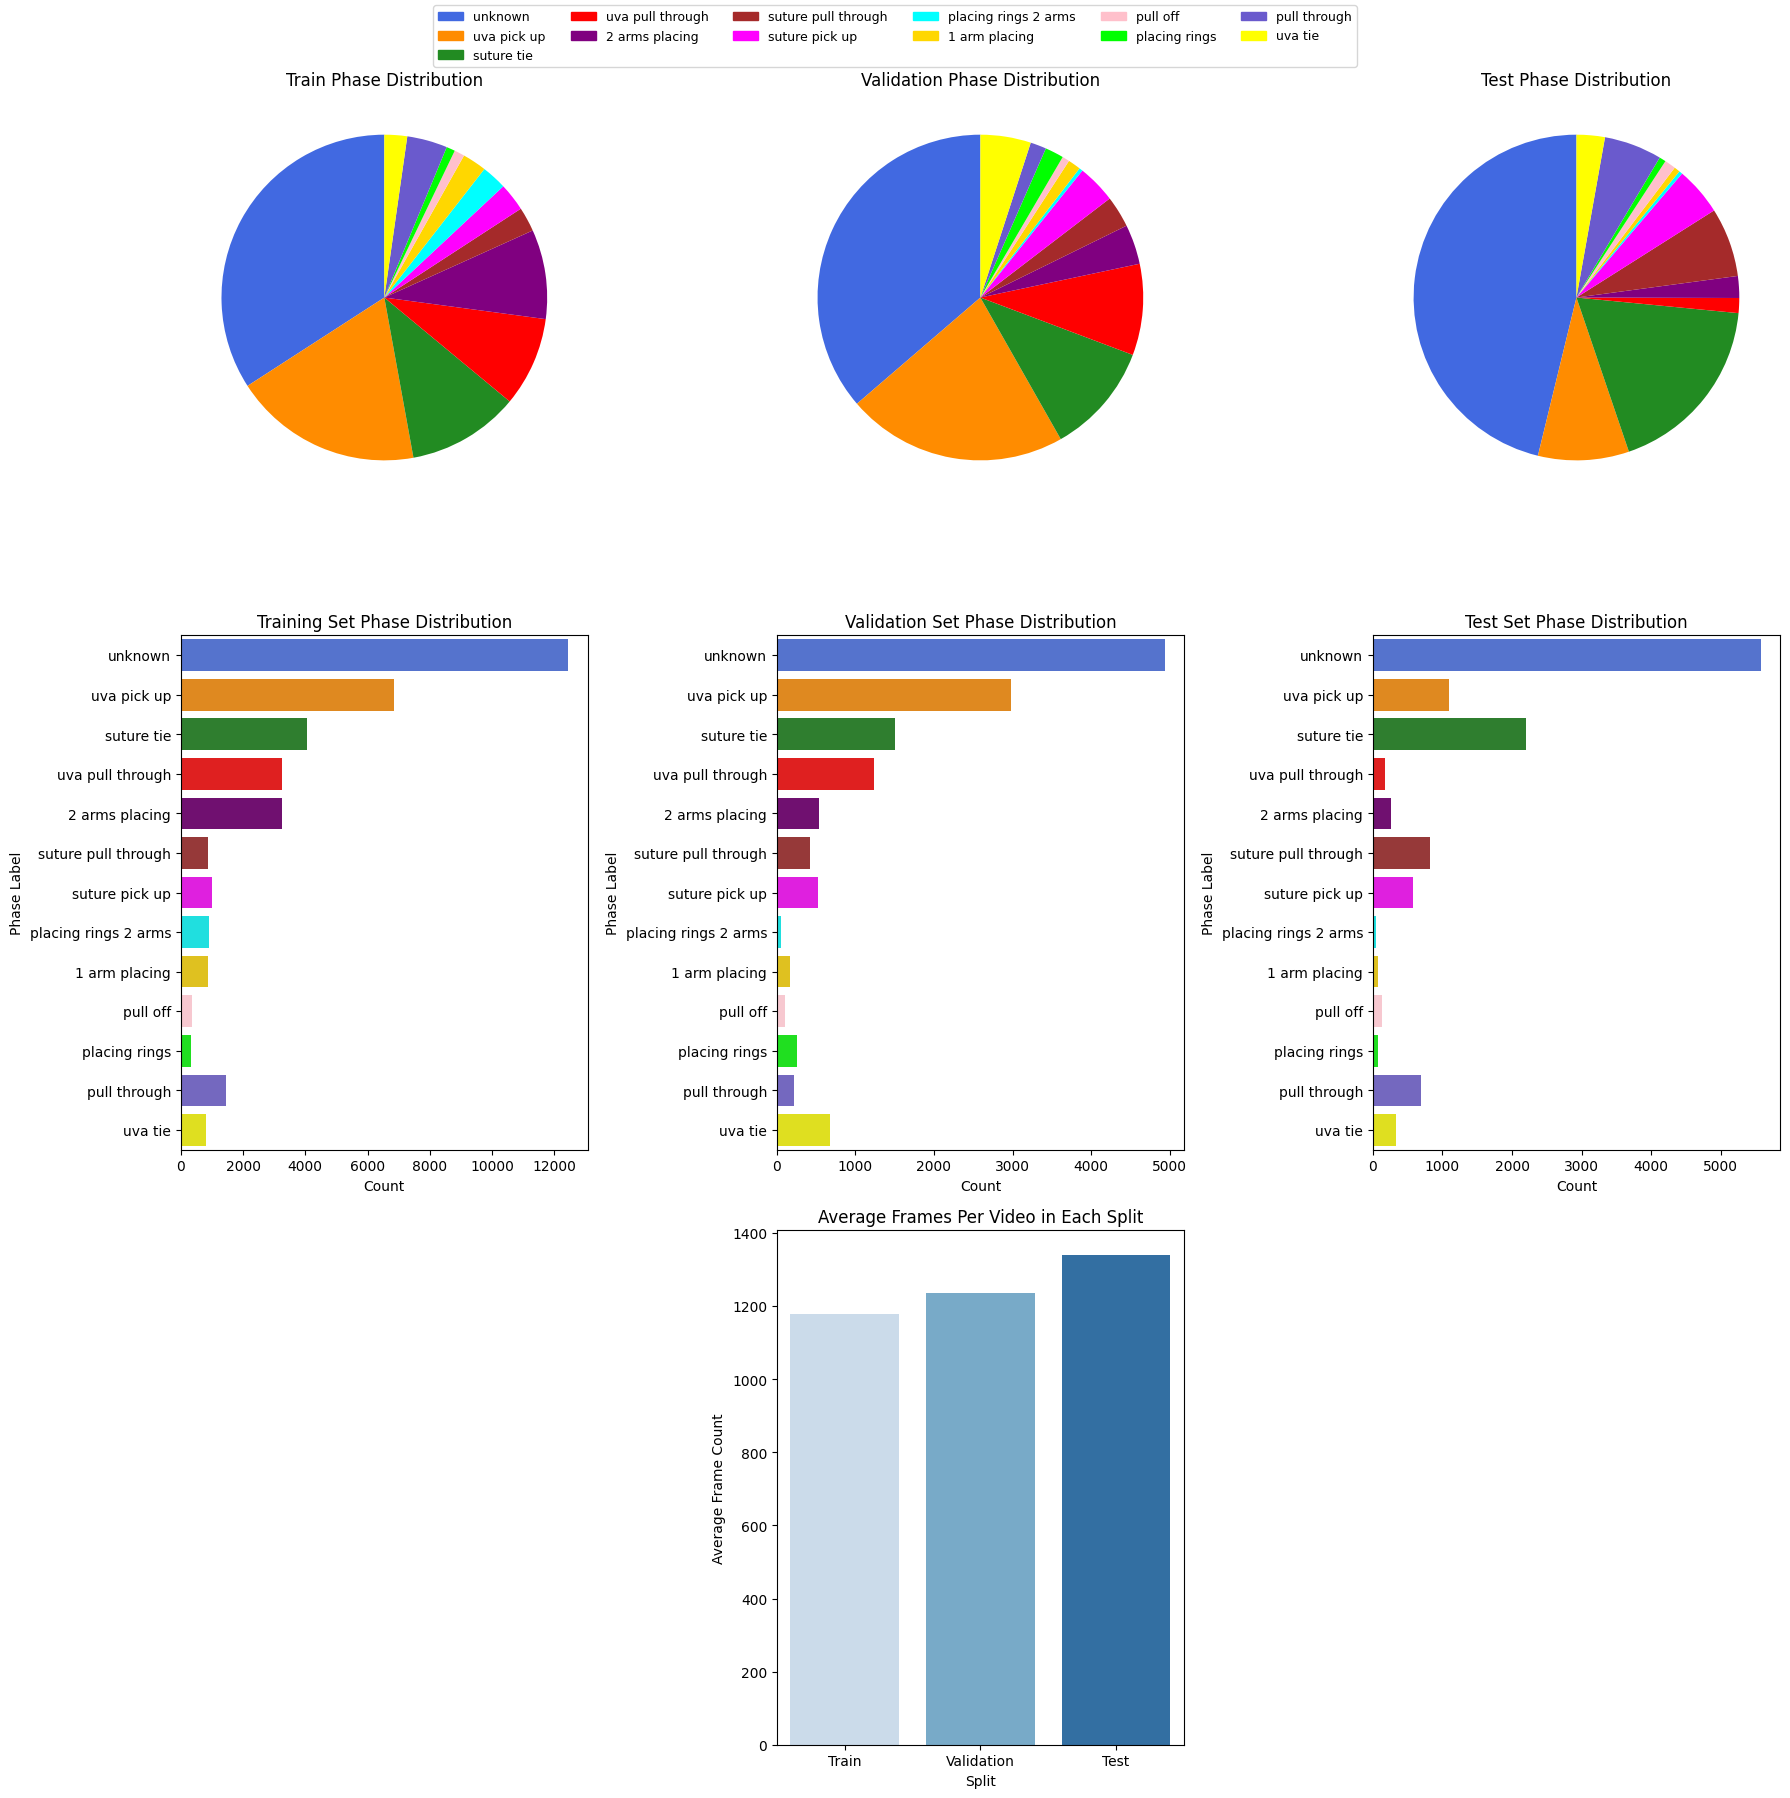

In [8]:
# Create figure with corrected layout (Pie Charts + Legend on Top, Phase Bars in Middle, Frame Distribution at Bottom)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# **Row 1: Phase Distribution Pie Charts**
wedges_train = plot_pie_chart(train, "Train Phase Distribution", axes[0, 0])
plot_pie_chart(val, "Validation Phase Distribution", axes[0, 1])
plot_pie_chart(test, "Test Phase Distribution", axes[0, 2])


# Create legend handles (color patches)
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in phase_colors.items()]

# Add the legend
fig.legend(
    handles=legend_handles,  
    loc="upper center", ncol=6, fontsize=9
)


# **Row 2: Phase Distribution Bar Charts**
plot_class_distribution(train, "Training Set Phase Distribution", axes[1, 0])
plot_class_distribution(val, "Validation Set Phase Distribution", axes[1, 1])
plot_class_distribution(test, "Test Set Phase Distribution", axes[1, 2])

# **Row 3: Average Frames Per Video → Span all three columns**
plot_avg_frames_per_video(train, val, test, axes[2, 1])
fig.delaxes(axes[2, 0])  # Remove left empty axis
fig.delaxes(axes[2, 2])  # Remove right empty axis

# Save plots before displaying
plt.savefig(output_path, dpi=300, bbox_inches="tight")


plt.tight_layout()
plt.show()


In [9]:

import pandas as pd

# Count frames per video
frames_per_video = train.groupby("video_id")["file_path"].count()

# Count unique phases per video
phases_per_video = train.groupby("video_id")["phase"].nunique()

# Extract unique phase names per video
unique_phases_per_video = train.groupby("video_id")["phase"].apply(lambda x: list(x.unique()))

# Merge all statistics into one DataFrame
stats_df = pd.DataFrame({
    "num_frames": frames_per_video,
    "num_phases": phases_per_video,
    "unique_phases": unique_phases_per_video
})

# Display results
print(stats_df)

# Save results to a CSV file
output_file = "../../reports/train_split_info.csv"
stats_df.to_csv(output_file)
print(f"Saved frame and phase statistics per video to {output_file}")


             num_frames  num_phases  \
video_id                              
0002_21             561           3   
0002_22             465           3   
0002_24            2073           4   
0002_29_X28        1155           4   
0003_21            1059           3   
0003_22             600           3   
0003_23             330           3   
0003_29            2433           4   
0004_21             780           3   
0004_22             609           3   
0004_23             369           2   
0004_26             879           3   
1000_21             486           3   
1000_26_X25         321           3   
1000_28_X27         192           2   
1002_30            4344           4   
1003_26             477           3   
1004_23             213           2   
1004_28_X27         315           2   
1005_30            3918           4   
1006_21             912           3   
1006_22             342           3   
1006_23             201           2   
1006_26             348  

In [15]:
# Calculate class weights
train_phase_counts = train["phase"].value_counts()
total_samples = sum(train_phase_counts)

print(train_phase_counts)

print("\n********************")

# Calculate class weights
val_phase_counts = val["phase"].value_counts()
total_samples = sum(val_phase_counts)

print(val_phase_counts)





phase
unknown                 12458
uva pick up              6840
suture tie               4058
uva pull through         3249
2 arms placing           3239
pull through             1462
suture pick up           1017
placing rings 2 arms      915
suture pull through       885
1 arm placing             871
uva tie                   823
pull off                  374
placing rings             313
Name: count, dtype: int64

********************
phase
unknown                 4934
uva pick up             2977
suture tie              1502
uva pull through        1231
uva tie                  680
2 arms placing           536
suture pick up           520
suture pull through      425
placing rings            251
pull through             215
1 arm placing            172
pull off                  98
placing rings 2 arms      48
Name: count, dtype: int64
